# Auto-graded part

The block below imports the necessary packages and sets up the "blob" dataset you will use in this example and sets the random seed to ensure reproducible results.

In [1]:
import numpy as np
import pylab as plt

from sklearn.datasets import make_blobs

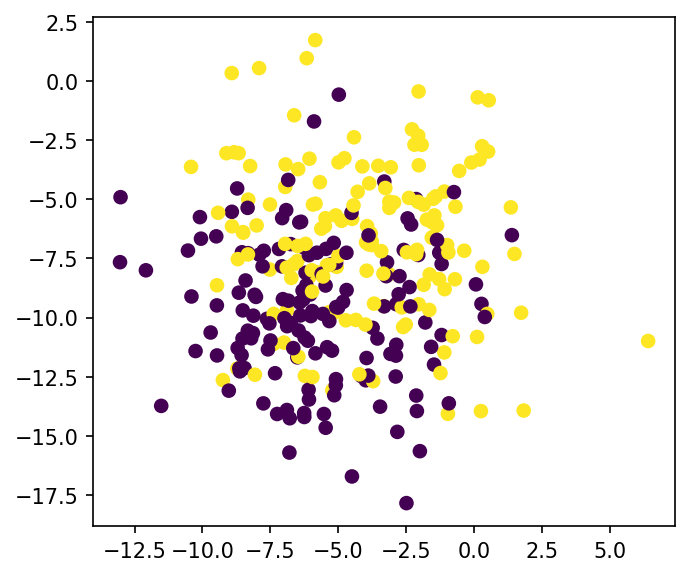

In [2]:
np.random.seed(65)

X_blob, y_blob = make_blobs(n_samples = 300, centers = 2, cluster_std = 3, n_features = 2)

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
ax.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob);

## 1. Perceptron Loss Function (22.5 pts)

Let's create a perceptron loss function by hand. The perceptron loss function discriminates between two different classes as follows:

$\bar{\bar{X}}\vec{w} > 0$ if $y_i = 1$ (class 1)

$\bar{\bar{X}}\vec{w} < 0$ if $y_i = -1$ (class 0)

Then, the perceptron loss function calculates $\sum_{i} max(0, -y_i\bar{\bar{X}}\vec{w})$. In this problem, you will play with `X_blob` and `y_blob`.

You may want to use `add_intercept` and `linear_classifier` functions through this problem.

In [ ]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    X_intercept = np.append(intercept, X, 1)
    return X_intercept

def linear_classifier(X, w):
    X_intercept = add_intercept(X)
    p = np.dot(X_intercept, w)
    return [1 if pi > 0 else -1 for pi in p]

### 1a: Rescaling the target vector for the perceptron loss function

First, we need to rescale the `y_blob` to fit the definition we made. By default, `y_blob` consists of classes of `0` and `1`, but for the loss function we need classes to be labeled by `-1` and `1`. Name the rescaled `y_blob` as `y_blob_rescaled`. (7.5 pts)

In [ ]:
########################################
# Start your code here
y_blob_rescaled = 2 * y_blob - 1
########################################

### 1b: Perceptron loss function

Create a function `perceptron` that calculates the $\sum_{i} max(0, -y_i\bar{\bar{X}}\vec{w})$. It should take the parameters as follows: (7.5 pts)

- w: parameter vector $\vec{w}$ (numpy.ndarray)
- X: feature matrix $\bar{\bar{X}}$ (numpy.ndarray, default value = `X_blob`)
- y: target classes $y_i$ (numpy.ndarray, default value = `y_blob_rescaled`)

In [ ]:
########################################
# Start your code here
def perceptron(w, X = X_blob, y = y_blob_rescaled):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept, w)
    
    return sum(np.maximum(0, -y * Xb))
########################################

In [ ]:
w1 = [10, 4, -10]
perceptron(w1)

In [ ]:
w2 = [12, 4, -5]
perceptron(w2, X_blob, y_blob)

### 1c: Training a perceptron model

Find the optimal weight vector by using `scipy.optimize.minimize` function. You should use the `L-BFGS-B` algorithm for minimizing the perceptron loss function, and all other settings of `minimize` should be the default e. The resulting optimized weight vector should be named as `w_opt`. The initial weight vector `w_init` is given for you. (2.5 pts)

In [ ]:
from scipy.optimize import minimize

w_init = [30, 20, -50]

In [ ]:
########################################
# Start your code here
res = minimize(perceptron, w_init, method = 'L-BFGS-B', tol=1e-8)
w_opt = res.x
########################################

### 1d: Metrics for assessing classification models

Report the accuracy, precision, and recall of your trained model as `accuracy`, `precision`, and `recall`, respectively. Positive refers to class 1 and negative refers to class -1. (5 pts)

In [ ]:
########################################
# Start your code here
from sklearn.metrics import accuracy_score, precision_score, recall_score

yhat = linear_classifier(X_blob, w_opt)

accuracy = accuracy_score(y_blob_rescaled, yhat)
precision = precision_score(y_blob_rescaled, yhat)
recall = recall_score(y_blob_rescaled, yhat)
########################################

## 2. Support Vector Machine (27.5 pts)

In this problem, you will make use of the built-in support vector machine classifier (SVC) from the `scikit-learn` package.

### 2a: Importing the SVC object
 First, import a `SVC` object from `sklearn.svm`. (5 pts)

In [ ]:
########################################
# Start your code here
from sklearn.svm import SVC
########################################

### 2b: Setting up a kernel support vector classifier

Declare a `SVC` object `svc` with `kernel='rbf'`. (7.5 pts)

In [ ]:
########################################
# Start your code here
svc = SVC(kernel = 'rbf')
########################################

### 2c: Optimizing SVC hyperparameters with GridSearchCV

Given the list of $\alpha$ below, find the optimum $\alpha$ that returns the highest accuracy score using `GridSearchCV` for `X_blob` and `y_blob_rescaled`. You need to use 5-fold cross validation during hyperparameter tuning. Report the optimum $\alpha$ as `opt_alpha` and corresponding mean cross-validated accuracy score `opt_cv_acc`. (7.5 pts)

Hint: Remember that $\alpha$ is inversely proportional to the $C$ value used in the SVC loss function.

In [ ]:
from sklearn.model_selection import GridSearchCV

alphas = np.array([1e-6, 1e-5, 1e-4, 1e-3])

In [ ]:
########################################
# Start your code here
param_grid = {'C': 1 / alphas}

gcv = GridSearchCV(svc, param_grid, cv = 5)
gcv.fit(X_blob, y_blob_rescaled)

opt_alpha = 1 / gcv.best_estimator_.C
opt_cv_acc = gcv.best_score_
########################################

### 2d: Optimizing precision instead of accuracy

One nice feature of `GridSearchCV` is that you can optimize the performance with different scoring metrics. This may result in the different set of optimized hyperparameters. For classification, `GridSearchCV` computes the accuracy score by default. Let's see how `opt_alpha` will change as you compare the precision score during cross-validation. Repeat the same process above, but set `scoring = 'precision'` for `GridSearchCV`. Report the optimal `alpha` as `opt_alpha_prec` and corresponding mean cross-validated precision score `opt_cv_prec`. (7.5 pts)

In [ ]:
########################################
# Start your code here
gcv = GridSearchCV(svc, param_grid, cv = 5, scoring = 'precision')
gcv.fit(X_blob, y_blob_rescaled)

opt_alpha_prec = 1 / gcv.best_estimator_.C
opt_cv_prec = gcv.best_score_
########################################

# Peer-graded section

The block below imports the necessary packages, sets up the "moons" dataset you will work with, and sets the random seed for repeatability.

In [3]:
import numpy as np
import pylab as plt

from sklearn.datasets import make_moons

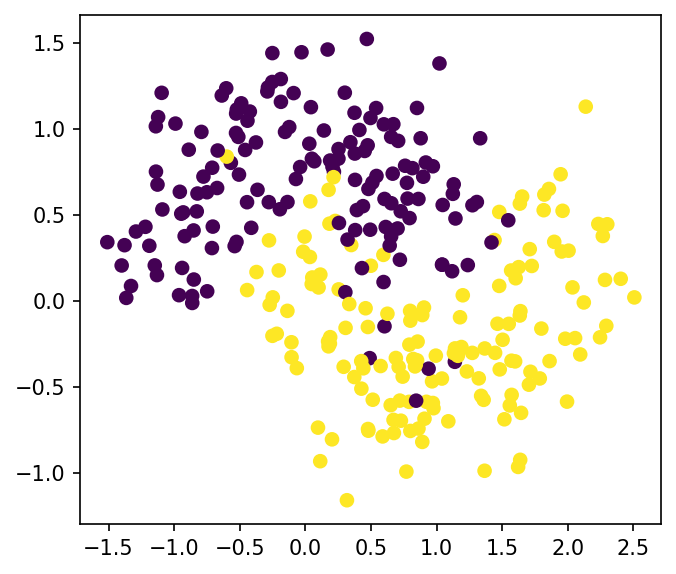

In [4]:
np.random.seed(65)

X_blob, y_blob = make_moons(n_samples = 300, noise=0.3)

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
ax.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob);

## 1. Separability

You've worked on classifying the blob data in the auto-graded section. In this section, you will work with the "moons" dataset and plot the result so that the classification performance can be assessed visually. Choose one loss function among perceptron, softmax, margin loss, counting loss, or suppor vector machine. Use the loss function to perform classification on the dataset above. Create a plot on which the data points are **color-coded by predicted classes** and the resulting **discrimination line is depicted as a black solid line**.

***We are not providing solution for this question because it is open ended. Everyone is encouraged to read the solutions of their peers and give grade them fairly. The code for loss functions can be compared with codes given in the lecture notes.***


The moons dataset is clearly linearly inseparable. Try using a non-linear transforms of the features to make the data more linearly separable. Plot the new feature vs. one of the original features to check to see how separable it is after the transform.

**You are not expected to be able to create a perfectly linearly separable dataset after the transformation. As long as the separability improves you can consider it successful.**

What was your strategy to transform the features? Briefly explain.

## 2. Discrimination Line

Derive the equation for the line that discriminates between the two classes. Consider a model of the form:

$\bar{\bar{X}}\vec{w} > 0$ if $y_i = 1$ (class 1)

$\bar{\bar{X}}\vec{w} \leq 0$ if $y_i = -1$ (class -1)

where $\bar{\bar{X}}=\left[\vec{x_0}, \vec{x_1}, \vec{1}\right]$ and $\vec{w} = \left[w_0, w_1, w_2\right]$.

The equation should be in the form of $x_1 = f\left(x_0\right)$. Show your work, and/or explain the process you used to arrive at the answer.

**Answer**

The discrimination line will be drawn where $\bar{\bar{X}}\vec{w}$=0.
  
$\bar{\bar{X}}\vec{w}$ = $w_0 x_0$ + $w_1 x_1$ + $w_2$=0
  
$\therefore x_1 = -\frac{w_0}{w_1}x_0 - \frac{w_2}{w_1}$

Next, we will consider a model with a non-linear transform defined by:

$y_i = w_0x_0 + w_1x_1 + w_2\left(x^2_0+x^2_1\right)$

where the model predicts class 1 if $y_i > 0$ and predicts class -1 if $y_i \leq 0$.

The equation should in the form of $x_1 = f\left(x_0\right)$. Show your work, and/or explain the process you used to arrive at the answer.

**Answer**

Discrimination line: $w_0 x_0 + w_1 x_1 + w_2 (x^{2}_{0} + x^{2}_{1})$ = 0

$w_2 x^{2}_{1} + w_1 x_1 + w_2 x^{2}_{0} + w_0 x_0$ = 0

$x^{2}_{1} + \frac{w_1}{w_2} x_1 = -x^{2}_{0} - \frac{w_0}{w_2} x_0$

$\left(x_1 + \frac{w_1}{2w_2}\right)^2 = -x_0\left(x_0 + \frac{w_0}{w_2}\right) + \frac{w^{2}_{1}}{4w^{2}_{2}}$

$\therefore x_1 = \pm\sqrt{-x_0\left(x_0 + \frac{w_0}{w_2}\right) + \frac{w^{2}_{1}}{4w^{2}_{2}}} - \frac{w_1}{2w_2}$

Briefly describe the nature of this boundary.

What is the shape of the bounday? Is is linear or non-linear? 

Hint: The form of the equation is a common one that you probably learned in highschool algebra.

**Answer**

This boundary should be circular and non-linear.

## 3. 6745 Only - Select one of the following two problems to solve

### 3a: Analytical gradient of the softmax function
The gradient of the softmax function is needed during optimization, and having an analytical form makes convergence faster and more numerically stable. 

Derive an analytical expression for the gradient of the softmax function with respect to $\vec{w}$.

The **softmax** loss function is defined as:

$g\left(\vec{w}\right)=\sum_i \mathrm{log}\left(1 + \mathrm{exp}\left(-y_i\vec{x}^T_i\vec{w}\right)\right)$

where $\vec{x}_i$ is the i-th row of the input matrix $\bar{\bar{X}}$.

***Hint***
- The function $g\left(\vec{w}\right)$ can be expressed as $f\left(r\left(s\left(\vec{w}\right)\right)\right)$ where $r$ and $s$ are arbitrary functions and the chain rule can be applied.
- You may want to review Ch.4 of "Machine Learning Refined, 1st Ed."

**Answer**

$log\left\{1 + exp\left(-y_i\vec{x_i}^T\vec{w}\right)\right\} = f\left(r\left(s\left(\vec{w}\right)\right)\right)$ where $f(r) = log\left(r\right)$, $r(s) = 1 + e^{-s}$, and $s(\vec{w})=y_i\vec{x_i}^T\vec{w}$  

Using the chain rule,  

$\frac{\partial}{\partial\vec{w}}f(r(s(\vec{w})))=\frac{df}{dr}\cdot\frac{dr}{ds}\cdot\frac{\partial}{\partial\vec{w}}s(\vec{w})=\frac{1}{r}\cdot(-e^{-s})\cdot y_i\vec{x_i}=\frac{1}{1+e^{-y_i\vec{x_i}^T\vec{w}}}\cdot(-e^{-y_i\vec{x_i}^T\vec{w}})\cdot y_i\vec{x_i}$  
  
$\therefore \frac{\partial g(\vec{w})}{\partial \vec{w}}=\sum_i \frac{1}{1+e^{-y_i\vec{x_i}^T\vec{w}}}\cdot(-e^{-y_i\vec{x_i}^T\vec{w}})\cdot y_i\vec{x_i}$

### 3b: Classification as non-linear regression

An alternative interpretation of classification is that we are performing non-linear regression to fit a **step function** to our data (because the output is either 0 or 1). Since step functions are not differentiable at the step, a smooth approximation with non-zero derivatives must be used. One such approximation is the ***tanh*** function:

$\mathrm{tanh\left(x\right)} = \frac{2}{1+e^{-x}} - 1$

This leads to a reformulation of the classification problem as:

$\vec{y} = \mathrm{tanh}\left(\bar{\bar{X}}\vec{w}\right)$

Show that this is mathematically equivalent to **logistic regression**, which is given by minimization of the **softmax** cost function.

**Answer**

Our expectation in the case of non-linear regression for a step function:

$y_i \approx 1$ if $\bar{\bar{X}}\vec{w} > 0$  

$y_i \approx -1$ if $\bar{\bar{X}}\vec{w} < 0$

---

In this case, $y_i\bar{\bar{X}}\vec{w}$ will always be positive.

$y_i\bar{\bar{X}}\vec{w} > 0 \rightarrow tanh(y_i\bar{\bar{X}}\vec{w})\approx1$

$tanh(y_i\bar{\bar{X}}\vec{w}) = \frac{2}{1 + \exp{(y_i\bar{\bar{X}}\vec{w}})} - 1 \approx 1$

$1 + \exp{(y_i\bar{\bar{X}}\vec{w}}) \approx 1$  

---

Therefore,
 
$log\left\{1 + exp(-y_i\bar{\bar{X}}\vec{w})\right\}\approx0$

$\therefore g_{softmax}(\vec{w}) = \sum_i log\left\{1 + exp(-y_i \bar{\bar{X}}\vec{w})\right\}\approx0$

which leads to minimization of the softmax cost function.